## Neural Network Cloud Detection
1. Data Peprocessing for Neural Network

In [1]:
import numpy as np
# Grab Dataset
data = np.genfromtxt('../data.csv', delimiter=',')

In [2]:
# Split data into y (label) and x (features)
y = data[:,0]
x = data[:,1:]
x = np.nan_to_num(x, nan=0.0)

In [3]:
# Any multi-layer cloud labels set to 1, turn into classification [cloud, no cloud]=[1,0]
y = np.where(y >= 1, 1, y)
print(y[0])

0.0


In [4]:
from sklearn.model_selection import train_test_split
# Split data into Train/Test/Validation 70/20/10
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

2. Build Neural Network Model

In [6]:
import tensorflow.keras as ks

model = ks.Sequential([
    ks.layers.Dense(32, activation='relu', input_shape=(x.shape[1],)),
    ks.layers.Dense(16, activation='relu'),
    ks.layers.Dense(8, activation='relu'),
    ks.layers.Dense(8, activation='relu'),
    ks.layers.Dense(4, activation='relu'),
    ks.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

3. Train Model

Epoch 1/40
3821/3821 [==============================] - 8s 2ms/step - loss: 0.3585 - accuracy: 0.8294 - val_loss: 0.3196 - val_accuracy: 0.8517
Epoch 2/40
3821/3821 [==============================] - 6s 2ms/step - loss: 0.3048 - accuracy: 0.8575 - val_loss: 0.2976 - val_accuracy: 0.8594
Epoch 3/40
3821/3821 [==============================] - 6s 2ms/step - loss: 0.2915 - accuracy: 0.8632 - val_loss: 0.2752 - val_accuracy: 0.8708
Epoch 4/40
3821/3821 [==============================] - 6s 1ms/step - loss: 0.2815 - accuracy: 0.8674 - val_loss: 0.2819 - val_accuracy: 0.8668
Epoch 5/40
3821/3821 [==============================] - 4s 1ms/step - loss: 0.2765 - accuracy: 0.8705 - val_loss: 0.2680 - val_accuracy: 0.8731
Epoch 6/40
3821/3821 [==============================] - 4s 980us/step - loss: 0.2720 - accuracy: 0.8713 - val_loss: 0.2596 - val_accuracy: 0.8779
Epoch 7/40
3821/3821 [==============================] - 4s 980us/step - loss: 0.2686 - accuracy: 0.8728 - val_loss: 0.2597 - val_accur

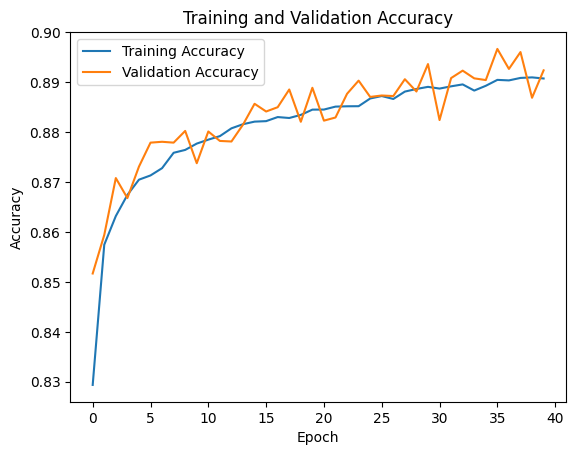

1092/1092 [==============================] - 1s 851us/step - loss: 0.2343 - accuracy: 0.8895
Test Accuracy: 0.8894869685173035


In [7]:
import matplotlib.pyplot as plt

# Train model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_val, y_val))

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

4. Downsample to compare to SVM

In [8]:
# Generate 10000 random indices
np.random.seed(7)
random_indices = np.random.choice(len(x), size=10000, replace=False)

# Select samples using the random indices
x = x[random_indices,:]
y = y[random_indices]

In [9]:
# cut down on features
# 0 and 6 were chosen from Random Forest's Feature Importance
x = x[:,[0,6]]

In [10]:
from sklearn.model_selection import train_test_split
# Split data into Train/Test/Validation 10/90
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
import tensorflow.keras as ks

model = ks.Sequential([
    ks.layers.Dense(16, activation='relu', input_shape=(x.shape[1],)),
    ks.layers.Dense(8, activation='relu'),
    ks.layers.Dense(8, activation='relu'),
    ks.layers.Dense(4, activation='relu'),
    ks.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
import matplotlib.pyplot as plt

# Train model
history = model.fit(X_train, y_train, epochs=40, batch_size=32)

# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/40
32/32 [==============================] - 1s 1ms/step - loss: 0.6804 - accuracy: 0.7400
Epoch 2/40
32/32 [==============================] - 0s 878us/step - loss: 0.6526 - accuracy: 0.7570
Epoch 3/40
32/32 [==============================] - 0s 1ms/step - loss: 0.6135 - accuracy: 0.7570
Epoch 4/40
32/32 [==============================] - 0s 897us/step - loss: 0.5749 - accuracy: 0.7570
Epoch 5/40
32/32 [==============================] - 0s 862us/step - loss: 0.5493 - accuracy: 0.7570
Epoch 6/40
32/32 [==============================] - 0s 854us/step - loss: 0.5404 - accuracy: 0.7570
Epoch 7/40
32/32 [==============================] - 0s 856us/step - loss: 0.5359 - accuracy: 0.7570
Epoch 8/40
32/32 [==============================] - 0s 901us/step - loss: 0.5315 - accuracy: 0.7570
Epoch 9/40
32/32 [==============================] - 0s 905us/step - loss: 0.5268 - accuracy: 0.7570
Epoch 10/40
32/32 [==============================] - 0s 850us/step - loss: 0.5208 - accuracy: 0.7590
Epo

## Save Neural Network Model!

In [14]:
from joblib import dump, load

dump(model, '../Saved_ML_Models/ann_model.joblib') 

['../Saved_ML_Models/ann_model.joblib']